# Introduction to *regularization*

## Lecture plan

- Review: linear regression and feature selection.
- Regularization: a new approach to feature selection. 
   - A conceptual introduction to regularization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Review: linear regression

### Review: modeling our data

> A **statistical model** is a mathematical model representing a "data-generating process".

- **Data-generating process** = how did our data come to be?  
   - We can't observe this directly, but we can **estimate** it.
- Usually involves learning a *relationship* (or **function**) between different variables (e.g., $X$ and $Y$).  
- ["All models are wrong, but some are useful"](https://en.wikipedia.org/wiki/All_models_are_wrong).  


### Linear regression: basics

> The goal of linear regression is to find the **line of best fit** between some variable(s) $X$ and the **continuous** dependent variable $Y$. 

- Assuming a *linear relationship* between inputs $X$ and response $Y$... 
- ...find parameters $\beta$ that minimize **prediction error**. 
- Allows for many predictors, but we'll start with **univariate regression**. 

### The line of "best fit"

> The goal of linear regression is to find the **line of best fit** between some variable(s) $X$ and the dependent variable $Y$. 

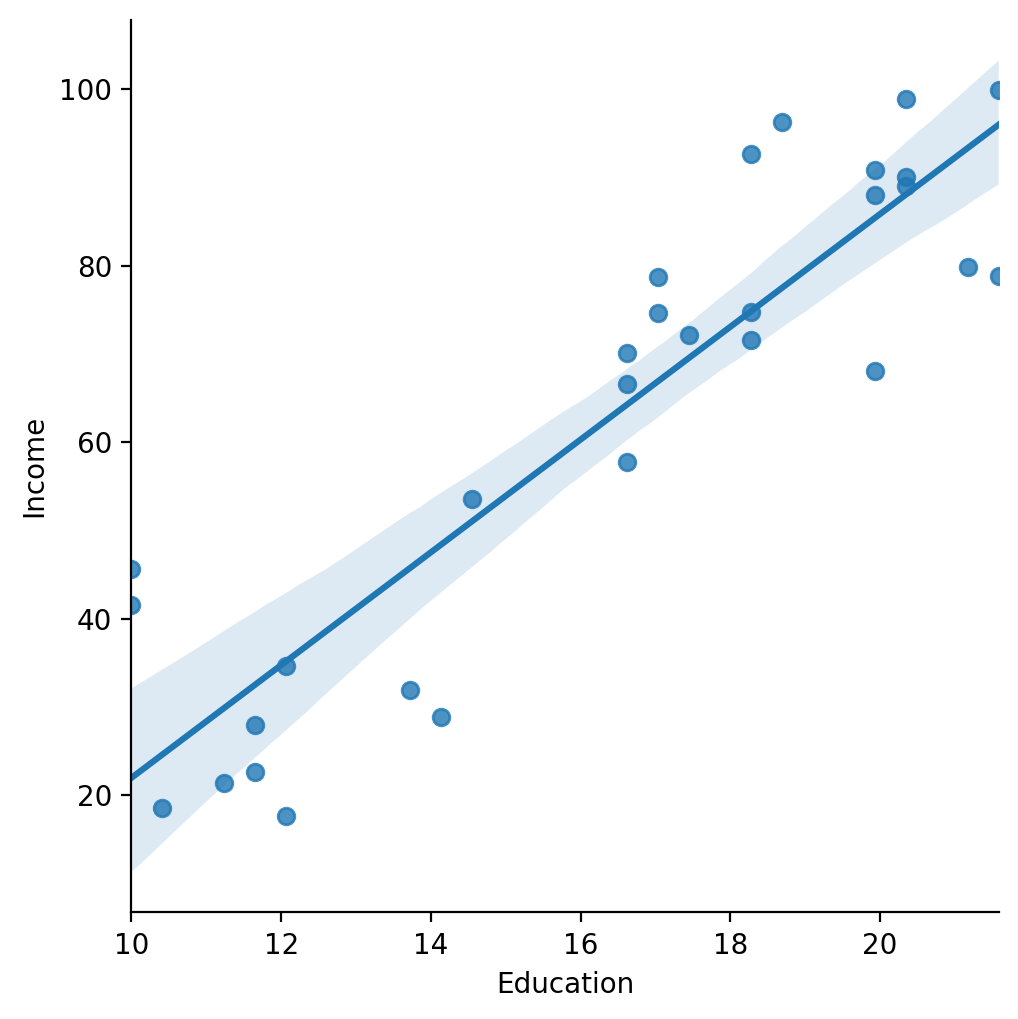

In [2]:
df_income = pd.read_csv("data/models/income.csv")
sns.lmplot(data = df_income, x = "Education", y = "Income")

### Modeling data in Python

We can use `statsmodels` to build a **regression model**.

In [3]:
mod = smf.ols(data = df_income, formula = "Income ~ Education").fit()
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

### Why multiple regression?

> **Multiple regression** means building a regression model (e.g., linear regression) with *more than one predictor*.

- Helps us build *better models*.
- Helps us *control for confounds* (e.g., `Temperature` vs. `IceCreamSales`).

But adding more **features** isn't always a good thing!

In [4]:
mod = smf.ols(data = df_income, formula = "Income ~ Education + Seniority").fit()
mod.params

Intercept   -50.085639
Education     5.895556
Seniority     0.172855
dtype: float64

### The problem of too many features...

- Adding more parameters will always at least *slightly* improve the model.  
- But too many parameters can also lead to **overfitting**. 
- It can also make the model very hard to **interpret**.
- Thus, it's important to identify which parameters are most important.

There are **many approaches** to identifying which parameters matter the most.

#### Check-in

Does anyone remember some of the approaches we discussed in CSS 2 for identifying the optimal subset of $p$ features to include in a model?

### Selecting the best features

Given $p$ possible features, which do we include in a model?

|Technique|Description|Trade-offs|
|---------|-----------|----------
|Best subset section|Build models for every possible combination of $p$ features; select the best one according to an evaluation metrics.|Optimal, but computationally intractable.|
|Forward stepwise selction|Start with a "null" model and add features in order of how much they improve the model.|Not guaranteed to find the best model, but more efficient.|
|Backward stepwise selection|Start with a "full" model and remove features in order of how little removing them hurts the model.|Not guaranteed to find the best model, but more efficient.|
|Hybrid stepwise selection|Implement both forward and backward stepwise selection to triangulate best combination of features.|Not guaranteed to find the best model, but more efficient.|

In each case, we can use some **metric** to measure model fit (e.g., $R^2$, $AIC$, and more); we can also combine this approach with **cross-validation**.


### An alternative approach...

- Each of the approaches just reviewed describes fitting *separate* models for each combination of $p$ predictors.  
- What if there were a way to fit a *single* model with all $p$ predictors, and use that single model to figure out which $p$ predictors are most useful?  
- This approach is called **regularization**.

## Introducing regularization

> In **regularization** (or *shrinkage*), we include all $p$ predictors, but apply a penalty that *constrains* (or *shrinks*) the size of the coefficient estimates assigned to those predictors.

### What's it good for?

- Improves **model fit**. 
   - Tends to reduce *variance* of coefficient estimates.  
   - Gets rid of (or minimizes impact of) less useful predictors.
- Identifies **most useful predictors**.
   - Survival of the most useful predictors!

### A "budget" for our coefficients

- In traditional **least squares regression**, we want to find the coefficients $\beta_1, ..., \beta_n$ that *minimize* our prediction error ($RSS$).  
   - In this formulation, our coefficients can be as large as they need to be.  
- In **regularization**, we want to minimize $RSS$...
- ...but we also have a **budget** for how big those coefficients can be.  
- I.e., our goal is to make our model as good as possible, subject to some *constraint* on how big our coefficients can get.
   - Importantly, we can make our budget **more or less strict**.
   
In the next slides, we'll walk through the *mathematical intuition* for this idea of a "budget".

### The traditional RSS approach

Traditionally, we'd want to minimize $RSS$:

$\Large RSS = \sum_{i=1}^n (y_i - (\beta_0 + \sum_{j=1}^p \beta_jx_{ij}))^2$

Breaking this down:

- $y_i$ is our **actual observation**.  
- $\beta_0 + \sum_{j=1}^p \beta_jx_{ij}$ is just the formula for obtaining $\hat{y}_i$, our **prediction**.
   - $\beta_0$: intercept.
   - Each $\beta_j$ is a coefficient for one of our predictors.

### Regularization: the Lasso

In **Lasso regression** (a kind of regularization), we want to minimize $RSS$, but we also have a "budget". 

Thus, we want to minimize:

$\Large RSS + \lambda\sum_{j=1}^{p}|\beta_j|$

Breaking this down:

- $RSS$ is what we just discussed: we want coefficients that *minimize* this value.  
- $|\beta_j|$ is the *absolute value* of a given coefficient. 
- $\sum_{j=1}^{p}|\beta_j|$ is the *sum* of those absolute values for our coefficients.
   - We also want to minimize this value!
- Finally, $\lambda$ is a **weight** for determining the importance and strictness of that budget.

#### Check-in: Building intuition

Given the lasso equation:

$RSS + \lambda\sum_{j=1}^{p}|\beta_j|$

What would be the impact of:

$\lambda = 0$?

$\lambda > 0$?

In [5]:
### Your answer here

### The role of $\lambda$

> The $\lambda$ (**lambda**) is a "tuning parameter", which determines how *strict* our budget is.

- When $\lambda = 0$, our equation collapses to the standard $RSS$ equation.
   - I.e., no budget!
- As $lambda > 1$, we *weigh* the sum of coefficient values more and more. 
  - Recall that we're trying to *minimize* this.
  - So a larger weight = stricter budget.


**Note**: $\lambda$ is sometimes called the **shrinkage penalty term**.

### The effect of *shrinkage* in Lasso

- In Lasso regression, we apply a **shrinkage penalty** to our coefficients.

$RSS + \lambda\sum_{j=1}^{p}|\beta_j|$

- In practice, this has the effect of *shrinking* some coefficients to $0$. 
   - The degree of shrinkage depends on $\lambda$.
- Thus, Lasso can create **sparse models**: models in which many coefficients are $0$.

### Multiple kinds of regularization

> **Regularization** is a general technique for applying a *shrinkage penalty* to our coefficients; there are multiple specific techniques for doing so.

- In **Lasso regression**, we apply an $L_1$ penalty.
   - $L_1$ penalty: minimize the sum of the *absolute values* of our coefficients. 
- In **Ridge regression**, we apply an $L_2$ penalty:
   - $L_2$ penalty: minimize the sum of the *squared values* of our coefficients.
   
Similar, but subtly different!

### The effect of the penalty term!

We can compare our two penalty terms as follows:

$L_1 = \lambda\sum_{j=1}^{p}|\beta_j|$

$L_2 = \lambda\sum_{j=1}^{p}\beta_j^2$

In practice:

- **Ridge regression** will shrink our coefficient values, but it will never shrink them to exactly zero.
- Whereas **Lasso regression** can shrink coefficient values to zero.
- The exact reason for this has to do with the unique *geometry* of their *constraint functions*.

### Lasso vs. ridge: when to use each?

- Lasso regression creates **sparse models**. 
   - Use this when you think only a *subset* of $p$ predictors matter.
- Ridge regression **shrinks coefficients, but not to zero**.
   - Use this when you think many variables contribute to the model, but must be shrunk to improve generalization.
   
Additionally, [Elastic Net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization) *combines* the $L_1$ and $L_2$ penalties.

## Lecture wrap-up

- Multiple regression is powerful, but sometimes results in **overfitted** or **uninterpretable** models.  
- **Regularization** can help with selecting the most useful features.  
- In addition to finding coefficients that minimize $RSS$... 
- ...we impose a "budget" on those coefficients. 
- The strictness of that budget is determined by $\lambda$.  
- The nature of the penalty is determined by $L_1$ (Lasso) vs. $L_2$ (ridge) penalty terms.

Next time, we'll discuss how to use regularization in Python!